In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kagglejson/'

In [2]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 2.05G/2.06G [01:42<00:00, 23.3MB/s]
100% 2.06G/2.06G [01:42<00:00, 21.6MB/s]


In [3]:
!unzip chest-xray-covid19-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

Populating the interactive namespace from numpy and matplotlib


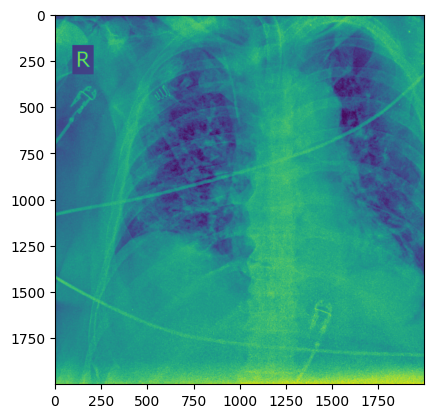

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/Data/train/COVID19/COVID19(0).jpg')
imgplot = plt.imshow(img)
plt.show()

In [5]:
img.shape

(2000, 2000)

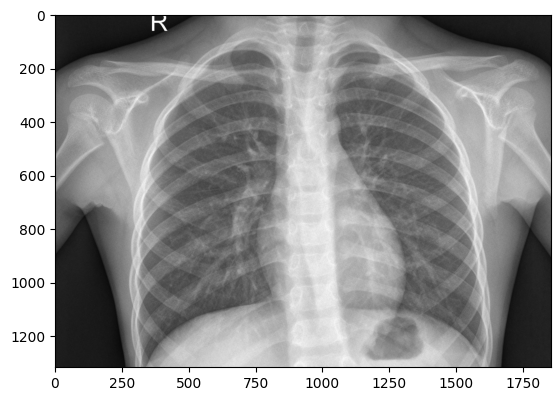

In [6]:
img=mpimg.imread('/content/Data/train/NORMAL/NORMAL(0).jpg')
imgplot = plt.imshow(img)
plt.show()

In [7]:
img.shape

(1317, 1855, 3)

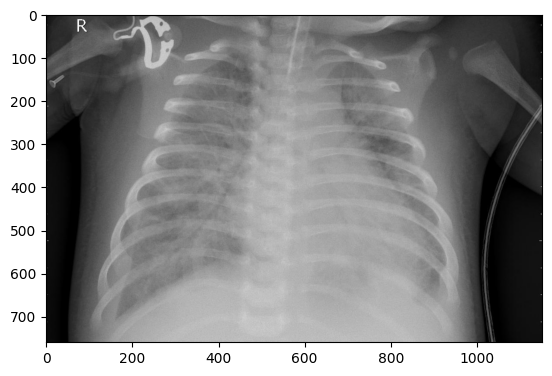

In [8]:
img=mpimg.imread('/content/Data/train/PNEUMONIA/PNEUMONIA(0).jpg')
imgplot = plt.imshow(img)
plt.show()

In [9]:
img.shape

(760, 1152, 3)

In [10]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/Data/train"
validation_data_dir=r"/content/Data/test"
nb_train_sample =100
nb_validation_samples =100
epochs =25
batch_size= 20

In [12]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [13]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator (rescale=1. /255)

In [14]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size, class_mode='categorical',classes=['COVID19','NORMAL','PNEUMONIA'])

Found 5144 images belonging to 3 classes.


In [15]:
validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [33]:
model = Sequential()
#Block1
model.add(Conv2D(256, (3,3), padding = 'same',input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Block2
model.add(Conv2D(512, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Block3
model.add(Conv2D(512, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Block4
model.add(Conv2D(1024, (3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Classification
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(128))
model.add(Dense(3))
model.add(Activation('softmax'))

In [34]:
model.summary(

)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 150, 150, 256)     7168      
                                                                 
 activation_203 (Activation)  (None, 150, 150, 256)    0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 256)      0         
 2D)                                                             
                                                                 
 conv2d_204 (Conv2D)         (None, 73, 73, 512)       1180160   
                                                                 
 activation_204 (Activation)  (None, 73, 73, 512)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 512)      0         
 2D)                                                    

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
training = model.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 1.1659 - accuracy: 0.6645

100/100 [==============================] - 70s 599ms/step - loss: 1.1659 - accuracy: 0.6645 - val_loss: 0.8332 - val_accuracy: 0.6638
Epoch 2/25
100/100 [==============================] - 38s 384ms/step - loss: 0.7139 - accuracy: 0.7165
Epoch 3/25
100/100 [==============================] - 38s 378ms/step - loss: 0.4844 - accuracy: 0.8085
Epoch 4/25
100/100 [==============================] - 36s 355ms/step - loss: 0.5014 - accuracy: 0.7838
Epoch 5/25
100/100 [==============================] - 36s 357ms/step - loss: 0.4591 - accuracy: 0.8191
Epoch 6/25
100/100 [==============================] - 37s 371ms/step - loss: 0.4075 - accuracy: 0.8280
Epoch 7/25
100/100 [==============================] - 37s 371ms/step - loss: 0.3653 - accuracy: 0.8513
Epoch 8/25
100/100 [==============================] - 37s 368ms/step - loss: 0.3627 - accuracy: 0.8625
Epoch 9/25
100/100 [==============================] - 37s 367ms/step - loss: 0.3381 - accuracy: 0.8679
Epoch 10/25
100/100 [=====================

### transfer learning

In [20]:
from keras import optimizers
from keras.applications import InceptionResNetV2
from keras.models import Model
from keras import applications

In [21]:
pre_trained_model = InceptionResNetV2(input_shape=input_shape, include_top=False, weights="imagenet")


219055592/219055592 [==============================] - 11s 0us/step


In [23]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block35_1_mixed')
last_output = last_layer.output

In [24]:
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = Dense(3, activation='softmax')(x)

model1 = Model(pre_trained_model.input, x)

In [25]:
model1.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [26]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
training_1 = model1.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

<ipython-input-27-839da6a1871d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_1 = model1.fit_generator(train_generator,


Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.4077 - accuracy: 0.7775

100/100 [==============================] - 72s 525ms/step - loss: 0.4077 - accuracy: 0.7775 - val_loss: 0.2261 - val_accuracy: 0.8773
Epoch 2/25
100/100 [==============================] - 33s 330ms/step - loss: 0.1891 - accuracy: 0.8997
Epoch 3/25
100/100 [==============================] - 33s 333ms/step - loss: 0.1421 - accuracy: 0.9250
Epoch 4/25
100/100 [==============================] - 31s 306ms/step - loss: 0.1376 - accuracy: 0.9200
Epoch 5/25
100/100 [==============================] - 33s 329ms/step - loss: 0.1087 - accuracy: 0.9410
Epoch 6/25
100/100 [==============================] - 31s 309ms/step - loss: 0.0998 - accuracy: 0.9500
Epoch 7/25
100/100 [==============================] - 33s 327ms/step - loss: 0.1145 - accuracy: 0.9485
Epoch 8/25
100/100 [==============================] - 32s 319ms/step - loss: 0.1065 - accuracy: 0.9425
Epoch 9/25
100/100 [==============================] - 31s 313ms/step - loss: 0.1080 - accuracy: 0.9435
Epoch 10/25
100/100 [=====================

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/Data/test/COVID19/COVID19(460).jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

In [29]:
rslt = model1.predict(img_pred)

1/1 [==============================] - 1s 725ms/step


In [32]:
if rslt[0][0]==0:
  prediction ="covid"
elif rslt[0][0]==1:
  prediction = "normal"
else:
  prediction ="pneumonia"
print('Prediction: ',prediction)

Prediction:  covid
